# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
d=[]
for i in data['Sales']:
    if i<=6:
        d.append(1)
    elif i>6 and i<=11:
        d.append(2)
    else:
        d.append(3)

In [6]:
data['Sales']=d

In [7]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,42,17,Yes,Yes
1,3,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,2,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
data1 = pd.get_dummies(data,columns=['US','Urban'],drop_first = True)

In [10]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US_Yes,Urban_Yes
0,2,138,73,11,276,120,Bad,42,17,1,1
1,3,111,48,16,260,83,Good,65,10,1,1
2,2,113,35,10,269,80,Medium,59,12,1,1
3,2,117,100,4,466,97,Medium,55,14,1,1
4,1,141,64,3,340,128,Bad,38,13,0,1


In [12]:
data1 = pd.get_dummies(data1,columns = ['ShelveLoc'])

In [13]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,US_Yes,Urban_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,2,138,73,11,276,120,42,17,1,1,1,0,0
1,3,111,48,16,260,83,65,10,1,1,0,1,0
2,2,113,35,10,269,80,59,12,1,1,0,0,1
3,2,117,100,4,466,97,55,14,1,1,0,0,1
4,1,141,64,3,340,128,38,13,0,1,1,0,0


In [17]:
x=data1.iloc[:,1:]
y=data1[['Sales']]

In [18]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,US_Yes,Urban_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,0,1,1,0,0


In [19]:
y.head()

,Sales
0,2
1,3
2,2
3,2
4,1


In [20]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [21]:
model = RandomForestClassifier(n_estimators=100, max_features=3,random_state=8)

In [23]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [25]:
pred=model.predict(x_test)

In [26]:
pred

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 1, 1, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1], dtype=int64)

In [28]:
pred=pd.Series(pred)

In [30]:
pred.value_counts()

2    55
1    20
3     5
dtype: int64

In [32]:
feature_imp = model.feature_importances_
feature_imp

array([0.12963069, 0.10684236, 0.08755073, 0.0990307 , 0.19165923,
       0.1092737 , 0.07547884, 0.01516737, 0.01821649, 0.05943635,
       0.06705596, 0.04065758])

In [33]:
imp_df = pd.DataFrame(feature_imp,columns=['importance'])
imp_df['features'] = x.columns
imp_df

,importance,features
0,0.129631,CompPrice
1,0.106842,Income
2,0.087551,Advertising
3,0.099031,Population
4,0.191659,Price
5,0.109274,Age
6,0.075479,Education
7,0.015167,US_Yes
8,0.018216,Urban_Yes
9,0.059436,ShelveLoc_Bad


<BarContainer object of 12 artists>

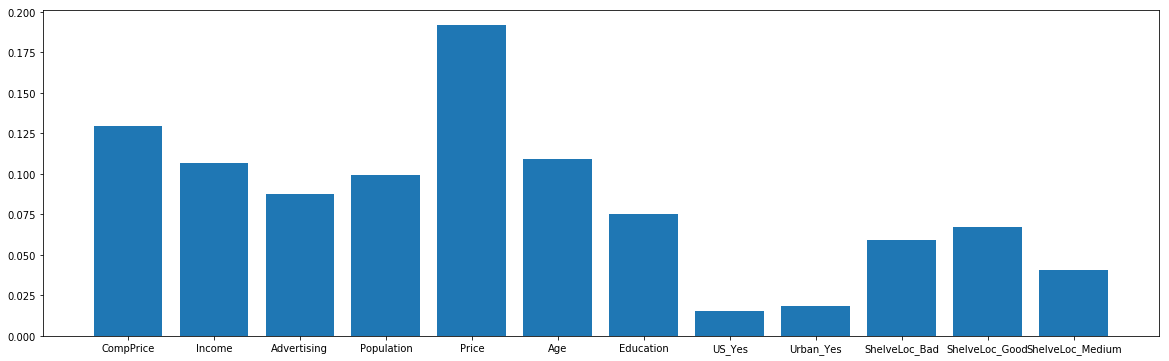

In [34]:
plt.figure(figsize=(20,6))
plt.bar(imp_df['features'],imp_df['importance'])